In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [20]:
column_names = ["Time"]
exc_data_path = "Data/mash_exc300K.dat"

# DATA IMPORT - Using Pandas because it is easier to me
for i in range(1,8):
    column_names.append(str(i))
site_df = pd.read_csv(exc_data_path, delimiter=" ", names=column_names)
site_df = site_df[(site_df.index % 10 == 0) | (site_df.index == len(site_df.index) - 1)]
site_values = site_df.values
eq_pop = site_values[-1][1:8]
full_time = site_df["Time"].values

#Start time
# end_time_values = np.array(site_df['Time'].iloc[4::5])
end_time_values = np.array(site_df['Time'])
end_time_values =end_time_values[2:]
end_time_values = end_time_values[end_time_values<=1000]

In [21]:
row_counts = []
for end_times in end_time_values:
    count = len(site_df[site_df['Time'] <= end_times])
    row_counts.append(count)

row_counts = np.array(row_counts)
print(row_counts)

[  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207]


[7.61815505e+01 4.43972734e+01 2.97774198e+01 2.21009265e+01
 1.78458746e+01 1.55052325e+01 1.35052207e+01 1.18135114e+01
 1.06540588e+01 8.13835194e+00 7.67314759e+00 7.25237728e+00
 6.88707421e+00 6.56607687e+00 6.27973125e+00 6.04018477e+00
 5.80738124e+00 5.23437379e+00 4.99601688e+00 4.84733432e+00
 4.73528552e+00 4.64251994e+00 4.46072905e+00 4.14312751e+00
 3.97739033e+00 3.87316605e+00 3.78522824e+00 2.38417403e+00
 1.80980593e+00 1.87155826e+00 7.73992040e-01 5.83023798e-01
 5.59340408e-01 5.40292619e-01 5.23350592e-01 5.05929086e-01
 4.93020000e-01 4.80083842e-01 4.67655253e-01 4.55974351e-01
 4.45148624e-01 4.34905810e-01 4.24958864e-01 4.14944432e-01
 4.04673137e-01 3.94051950e-01 3.83013854e-01 3.71729380e-01
 3.60450784e-01 3.49552195e-01 3.39340287e-01 3.29903009e-01
 3.21300056e-01 3.13543435e-01 3.06532717e-01 3.00023447e-01
 2.93876848e-01 2.87972079e-01 2.82196754e-01 2.76408229e-01
 2.70460013e-01 2.64314768e-01 2.57912271e-01 2.51301227e-01
 2.44314528e-01 2.367259

Text(0, 0.5, 'Residual Sum over Count')

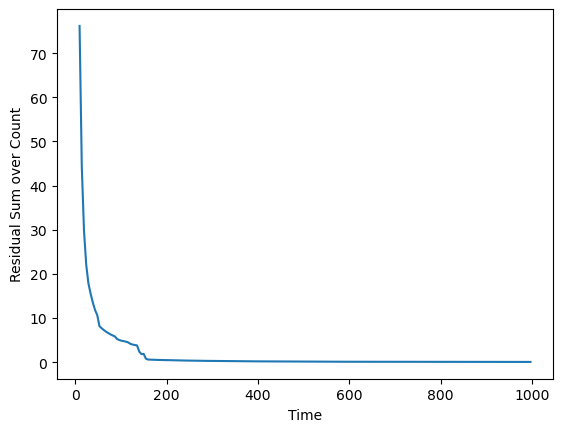

In [25]:
residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/residual_data.dat")
residuals_per_count = residual_data[:,1]/row_counts
print(residuals_per_count)
plt.plot(residual_data[:,0],residuals_per_count)

plt.xlabel("Time")
plt.ylabel("Residual Sum over Count")

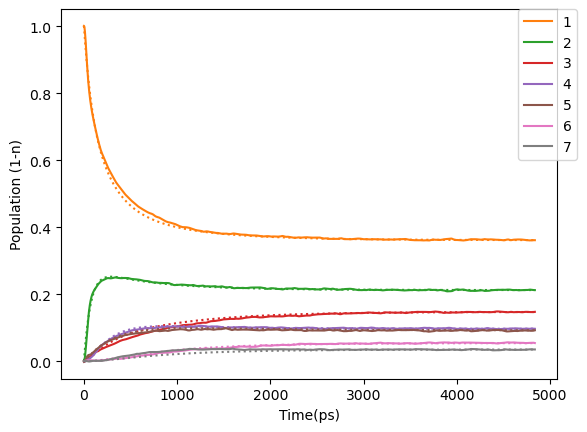

In [23]:
ls_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/203.18634897352192_41.dat")
exc_data = np.loadtxt(exc_data_path)
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    plt.plot(exc_data[:,0], exc_data[:,i],"-", label=column_name, color=c)
    plt.plot(ls_data[:,0],ls_data[:,i], ":",color=c)

plt.xlabel("Time(ps)")
plt.ylabel("Population (1-n)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.show()

Text(0, 0.5, 'Residual Sum over Count')

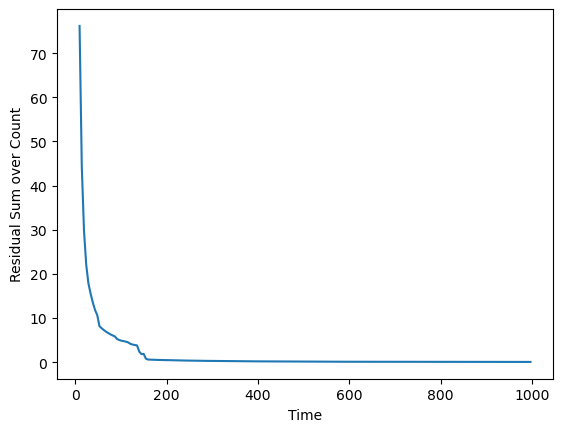

In [26]:
residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/Divided_residuals/residualdivided_data.dat")

plt.plot(residual_data[:,0],residuals_per_count)

plt.xlabel("Time")
plt.ylabel("Residual Sum over Count")